**Лабораторная работа 4**

Изучение зависимости погрешности решения линейных
уравнений различными модификациями метода Гаусса от
размера матрицы

>Цель работы

Используя результаты предыдущих лабораторных работ исследовать зависимость
погрешности вычислений решения системы уравнений A· x=b классическим методом Гаусса,
методом Гаусса с перестановками по столбцам, по строкам, по столбцам и строкам
одновременно для действительных квадратных матриц принадлежащих RN×N от N.

>Задание

* Результатом работы должен быть график зависимости погрешности решения системы
уравнений A·x=b, где A ∈ RN×N, x ∈ RN, b ∈ RN четырьмя способами указанными в
описании цели работы от N. При этом для каждой модификации алгоритма необходимо
построить график, как для случая с диагональным преобладанием, так и для случая без
диагонального преобладания. В итоге должно получиться 8 графиков, 4 для случая с
диагональным преобладанием и 4 для случая, когда диагональное преобладание не
выполняется.
* Рекомендуется изменять N от 3 до порядка 500 с шагом порядка 10.
* Значения aij матрицы A генерируются случайным образом, но всегда строго в одном и том
же диапазоне aij ∈ [m,n], при этом значения m и n рекомендуется выбирать равными
порядка 0 и 10 соответственно. Точное значение x предлагается брать вида x=[x1, x2,…,
xN]^T, где x1=x2=...=xN ≈1, вектор b=[b1, b2,…, bN]^T получаем путем перемножения A на x.



*В ходе реализации были сипользованы лабораторные работы 1, 2 и 3. Также выводится полная информация по прохождению тестов, информация по времени работы программы на тесте, усредненные данные прохождения всех тестов.*


---------------------------------------
TEST 0.0 	(n = 3 , pow = 9 )
-----------------Diagonal dominant:
Libruary: 	2.220446049250313e-16		1008
Gauss: 	2.220446049250313e-16		33
Gauss columns: 	2.220446049250313e-16		33
Gauss rows: 	2.220446049250313e-16		34
Gauss columns and rows: 	2.220446049250313e-16		35
-----------------Not diagonal dominant:
Libruary: 	1.1111663134685663e-14		121
Gauss: 	7.281065720152566e-15		25
Gauss columns: 	6.855570991454365e-15		32
Gauss rows: 	7.281065720152566e-15		26
Gauss columns and rows: 	6.855570991454365e-15		36

---------------------------------------
TEST 1.0 	(n = 13 , pow = 7 )
-----------------Diagonal dominant:
Libruary: 	9.28879225241625e-16		113
Gauss: 	7.850462293418876e-16		371
Gauss columns: 	7.850462293418876e-16		445
Gauss rows: 	7.850462293418876e-16		462
Gauss columns and rows: 	7.850462293418876e-16		492
-----------------Not diagonal dominant:
Libruary: 	7.260722772680618e-15		109
Gauss: 	6.557838461428371e-15		419
Gauss columns: 	4

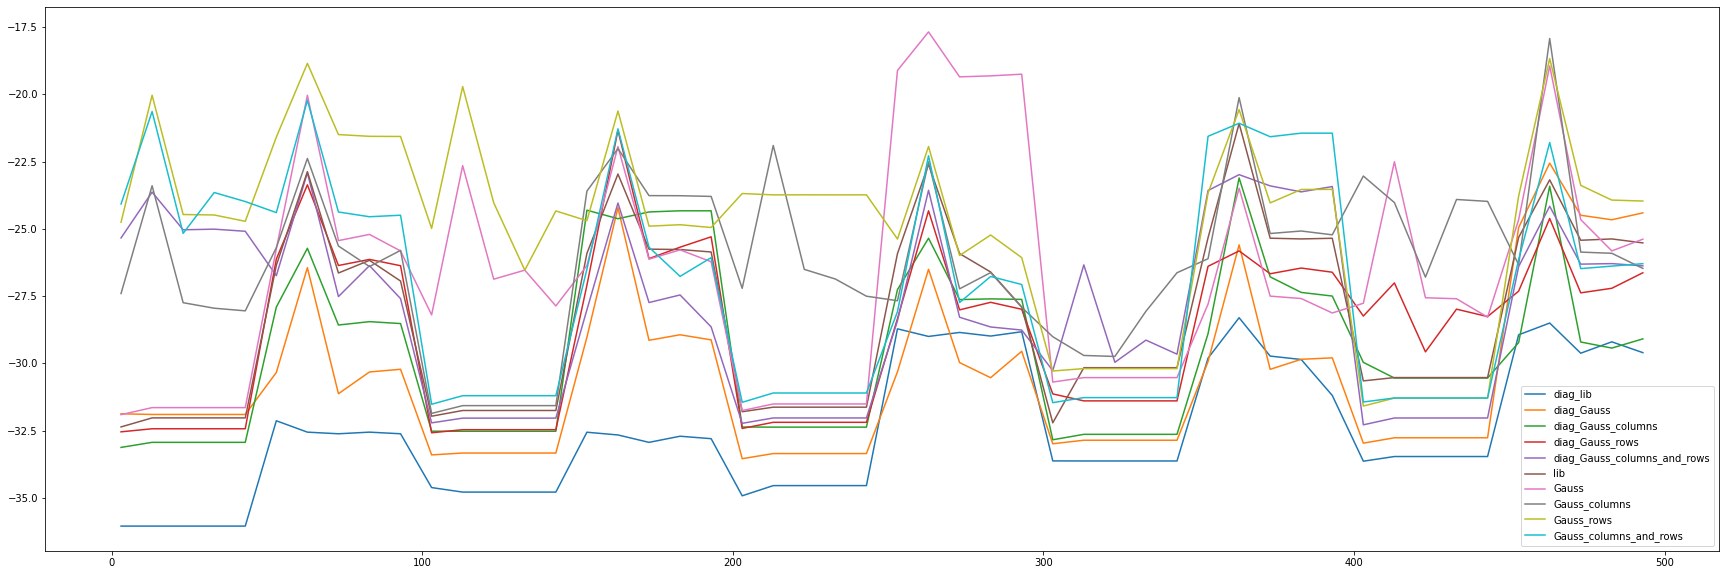

In [ ]:
import datetime
import matplotlib.pyplot
import numpy
import random
import math
import time


def get_random(a, b):
    return random.random() * (b - a) + a


def get_randint(a, b):
    return random.randint(a, b)


def sub_matr_rows(matr, i, j):
    if matr[i][i] == 0:
        return matr
    cf = matr[j][i] / matr[i][i]
    for w in range(len(matr[j])):
        matr[j][w] -= matr[i][w] * cf
    return matr


def generate_matrix(n, a, b, pow):
    res = []
    for i in range(n):
        str = []
        for j in range(n):
            if i == j:
                str.append(get_random(a, b) * 10 ** pow)
            else:
                str.append(get_random(a, b))
        res.append(str)
    return res


def generate_vector(n, a, b):
    res = []
    for i in range(n):
        res.append(get_random(a, b))
    return res


def print_matr(matr):
    print('SIZE', len(matr), ' x ', len(matr[0]))
    for row in matr:
        print(row)
    print()


def mul_matrix_vector(matr, vec):
    res = []
    for j in range(len(matr)):
        sum = 0.0
        for i in range(len(vec)):
            sum += matr[j][i] * vec[i]
        res.append(sum)
    return res


def get_evkl_norm(vec1, vec2):
    vec = []
    for i in range(len(vec1)):
        vec.append(vec1[i] - vec2[i])

    sum = 0.0
    for v in vec:
        sum += v ** 2
    return math.sqrt(sum)


def swap_rows(matr, i, j):
    if i == j:
        return matr
    tmp = matr[i]
    matr[i] = matr[j]
    matr[j] = tmp
    return matr


def swap_columns(matr, i, j, pos_vector):
    if i == j:
        return matr, pos_vector

    pos_vector[i], pos_vector[j] = pos_vector[j], pos_vector[i]

    for row in matr:
        tmp = row[i]
        row[i] = row[j]
        row[j] = tmp

    return matr, pos_vector


def find_max_in_column(matr, i):
    if i == len(matr) - 1:
        return i
    pos_max = i
    for j in range(i + 1, len(matr)):
        if abs(matr[j][i]) > abs(matr[pos_max][i]):
            pos_max = j
    return pos_max


def find_max_in_row(matr, i):
    if i == len(matr) - 1:
        return i
    pos_max = i
    for j in range(i + 1, len(matr)):
        if abs(matr[i][pos_max]) < abs(matr[i][j]):
            pos_max = j
    return pos_max


def find_max_in_both(matr, i):
    pos_max_row = find_max_in_row(matr, i)
    pos_max_column = find_max_in_column(matr, i)
    if abs(matr[pos_max_column][i]) > abs(matr[i][pos_max_row]):
        return pos_max_column, False
    else:
        return pos_max_row, True


def set_res_with_pos_vector(res, pos_vector):
    result = [0.0] * len(res)
    for i in range(len(pos_vector)):
        result[pos_vector[i]] = res[i]
    return result


def Gauss(matr, vec):
    for i in range(len(vec)):
        matr[i].append(vec[i])

    for i in range(len(matr)):
        for j in range(i + 1, len(matr), 1):
            matr = sub_matr_rows(matr, i, j)

    res = [0.0] * len(matr)
    cnt = 0

    for i in range(len(matr) - 1, -1, -1):
        sum = 0.0
        for j in range(0, cnt, 1):
            pos = len(res) - j - 1
            sum += matr[i][pos] * res[pos]
        res[i] = (matr[i][len(matr)] - sum) / matr[i][i]
        cnt += 1

    return res


def Gauss_rows(matr, vec):
    for i in range(len(vec)):
        matr[i].append(vec[i])

    for i in range(len(matr)):
        pos_max = find_max_in_column(matr, i)
        matr = swap_rows(matr, i, pos_max)
        for j in range(i + 1, len(matr), 1):
            matr = sub_matr_rows(matr, i, j)
    res = [0.0] * len(matr)
    cnt = 0

    for i in range(len(matr) - 1, -1, -1):
        sum = 0.0
        for j in range(0, cnt, 1):
            pos = len(res) - j - 1
            sum += matr[i][pos] * res[pos]
        res[i] = (matr[i][len(matr)] - sum) / matr[i][i]
        cnt += 1

    return res


def Gauss_columns(matr, vec):
    pos_vector = []
    for i in range(0, len(matr)):
        pos_vector.append(i)

    for i in range(len(vec)):
        matr[i].append(vec[i])

    for i in range(len(matr) - 1):
        pos_max = find_max_in_row(matr, i)
        matr, pos_vector = swap_columns(matr, pos_max, i, pos_vector)
        for j in range(i + 1, len(matr), 1):
            matr = sub_matr_rows(matr, i, j)

    res = [0.0] * len(matr)
    cnt = 0

    for i in range(len(matr) - 1, -1, -1):
        sum = 0.0
        for j in range(0, cnt, 1):
            pos = len(res) - j - 1
            sum += matr[i][pos] * res[pos]
        res[i] = (matr[i][len(matr)] - sum) / matr[i][i]
        cnt += 1

    return set_res_with_pos_vector(res, pos_vector)


def Gauss_columns_and_rows(matr, vec):
    pos_vector = []
    for i in range(len(matr)):
        pos_vector.append(i)

    for i in range(len(vec)):
        matr[i].append(vec[i])

    for i in range(len(matr)):
        pos_max, is_row = find_max_in_both(matr, i)
        if is_row:
            matr, pos_vector = swap_columns(matr, pos_max, i, pos_vector)
        else:
            matr = swap_rows(matr, pos_max, i)
        for j in range(i + 1, len(matr), 1):
            matr = sub_matr_rows(matr, i, j)

    res = [0.0] * len(matr)
    cnt = 0
    for i in range(len(matr) - 1, -1, -1):
        sum = 0.0
        for j in range(0, cnt, 1):
            pos = len(res) - j - 1
            sum += matr[i][pos] * res[pos]
        res[i] = (matr[i][len(matr)] - sum) / matr[i][i]
        cnt += 1

    return set_res_with_pos_vector(res, pos_vector)


diff_res = [0.0] * 10
diff_time = [0.0] * 5
results = [[]] * 10


def get_time(func, matr, vec):
    start = datetime.datetime.now()
    res, time = func(matr, vec), datetime.datetime.now() - start
    return res, time.microseconds


def copy_matr(matr):
    res = []
    for i in matr:
        res2 = []
        for j in i:
            res2.append(j)
        res.append(res2)

    return res


def get_diff_methods(matr, vec, abs_ans, type):
    global results
    matr2 = copy_matr(matr)
    matr3 = copy_matr(matr)
    matr4 = copy_matr(matr)
    matr5 = copy_matr(matr)
    lib_ans, lib_time = get_time(numpy.linalg.solve, matr, vec)
    g_ans, g_time = get_time(Gauss, matr2, vec)
    g_c_ans, gc_time = get_time(Gauss_columns, matr3, vec)
    g_r_ans, gr_time = get_time(Gauss_rows, matr4, vec)
    g_c_a_r_ans, gcar_time = get_time(Gauss_columns_and_rows, matr5, vec)

    lib_err = get_evkl_norm(abs_ans, lib_ans)
    g_err = get_evkl_norm(abs_ans, g_ans)
    g_c_err = get_evkl_norm(abs_ans, g_c_ans)
    g_r_err = get_evkl_norm(abs_ans, g_r_ans)
    g_c_a_r_err = get_evkl_norm(abs_ans, g_c_a_r_ans)

    if type == 'usual':
        diff_res[0] += lib_err
        diff_res[1] += g_err
        diff_res[2] += g_c_err
        diff_res[3] += g_r_err
        diff_res[4] += g_c_a_r_err
        results[0].append(lib_err)
        results[1].append(g_err)
        results[2].append(g_c_err)
        results[3].append(g_r_err)
        results[4].append(g_c_a_r_err)
    elif type == 'diag':
        diff_res[5] += lib_err
        diff_res[6] += g_err
        diff_res[7] += g_c_err
        diff_res[8] += g_r_err
        diff_res[9] += g_c_a_r_err
        results[5].append(lib_err)
        results[6].append(g_err)
        results[7].append(g_c_err)
        results[8].append(g_r_err)
        results[9].append(g_c_a_r_err)

    diff_time[0] += lib_time
    diff_time[1] += g_time
    diff_time[2] += gc_time
    diff_time[3] += gr_time
    diff_time[4] += gcar_time

    print(f"Libruary: \t{lib_err}\t\t{lib_time}")
    print(f"Gauss: \t{g_err}\t\t{g_time}")
    print(f"Gauss columns: \t{g_c_err}\t\t{gc_time}")
    print(f"Gauss rows: \t{g_r_err}\t\t{gr_time}")
    print(f"Gauss columns and rows: \t{g_c_a_r_err}\t\t{gcar_time}")

    return [lib_err, g_err, g_c_err, g_r_err, g_c_a_r_err]


def print_accumulative_results(it):
    print("\n\nAverage differencies and times\n---------------------")
    global diff_time
    global diff_res
    for i in range(len(diff_res) - 5):
        print(diff_res[i] / it, diff_time[i] / it, sep='\t|\t')
        print(diff_res[i + 5] / it, diff_time[i] / it, sep='\t|\t')


def split_2_into_10(arr1, arr2):
    res = [[]] * 10
    for i in range(len(arr1)):
        for j in range(5):
            res[j].append(arr1[i][j])
            res[j + 5].append(arr2[i][j])
    return res


def draw(res):
    global results
    print(results)
    xs = []
    for i in range(3, 500, 10):
        xs.append(i)

    matplotlib.pyplot.figure(figsize=(30, 10))
    cnt = 0
    for r in results:
        # print(len(r))
        matplotlib.pyplot.plot(xs, numpy.log(numpy.array(r[cnt * len(xs) : (cnt + 1) * len(xs)])))
        cnt += 1
    matplotlib.pyplot.legend(['diag_lib', 'diag_Gauss', 'diag_Gauss_columns', 'diag_Gauss_rows', 'diag_Gauss_columns_and_rows', 'lib', 'Gauss', 'Gauss_columns', 'Gauss_rows', 'Gauss_columns_and_rows'])


def do_cycle():
    diff_usual = []
    diff_diagonal = []
    for i in range(3, 500, 10):
        n = i

        pow = get_randint(0, 10)

        print("\n---------------------------------------\nTEST", (i - 3) / 10, "\t(n =", n, ", pow =", pow, ")")

        print('-----------------Diagonal dominant:')
        matr = generate_matrix(n, get_random(-5, 5), get_random(-5, 5), pow)
        vec = generate_vector(n, get_random(0.9, 1.1), get_random(0.9, 1.1))
        res = mul_matrix_vector(matr, vec)
        diff_diagonal.append(get_diff_methods(matr, res, vec, 'diag'))

        print('-----------------Not diagonal dominant:')

        matr = generate_matrix(n, get_random(-5, 5), get_random(-5, 5), 0)
        vec = generate_vector(n, get_random(0.9, 1.1), get_random(0.9, 1.1))
        res = mul_matrix_vector(matr, vec)
        diff_usual.append(get_diff_methods(matr, res, vec, 'usual'))


    draw(split_2_into_10(diff_diagonal, diff_usual))


do_cycle()
print_accumulative_results(503 / 10)


def trans_matrix(matr):
    res = [] * len(matr)
    for i in range(len(matr)):
        res_small = []
